#  CSTR fault detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.io
import matplotlib.image as mpimg

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(-0.5, 1096.5, 551.5, -0.5)

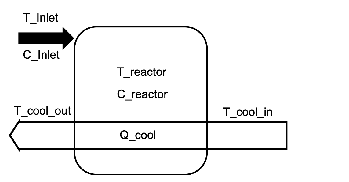

In [2]:
cstr= mpimg.imread('cstr.png')
plt.imshow(cstr)
plt.axis('off')

In [3]:
mat = scipy.io.loadmat('cstr_fault_time_series.mat')


In [4]:
fault_label=mat["fault_labels"].flatten()
data = pd.DataFrame({'C_inlet':mat["data"][:, 0], 'T_inlet':mat["data"][:, 1] \
                     ,'C_reactor':mat["data"][:, 2], 'T_reactor':mat["data"][:, 3] \
                     ,'Q_cool':mat["data"][:, 4], 'T_cool_in':mat["data"][:, 5]\
                     ,'T_cool_out':mat["data"][:, 6],'fault':fault_label
                    
                    })
data.head()

C_inlet  C_reactor      Q_cool   T_cool_in  T_cool_out     T_inlet  \
0  1.027647   0.099224  148.841248  348.638761  416.686204  350.360361   
1  1.027779   0.094646  157.013774  348.713451  417.987404  350.299300   
2  1.026808   0.108838  154.560242  349.188551  414.600037  349.971868   
3  1.026215   0.097684  157.220063  348.729069  416.656083  350.640629   
4  1.026132   0.100689  162.379105  348.849656  416.179071  350.595431   

    T_reactor  fault  
0  430.879667      0  
1  432.911189      0  
2  429.661746      0  
3  432.256645      0  
4  431.304828      0

In [49]:
normal=data[data['fault']==0]
normal = normal.drop('fault', 1)
normal['heat']=normal['Q_cool']*(normal['T_cool_out']-normal['T_cool_in'])

In [80]:
f1=data[data['fault']==1]
f1=f1.drop('fault', 1)

f2=data[data['fault']==2]
f2=f2.drop('fault', 1)

f3=data[data['fault']==3]
f3=f3.drop('fault', 1)

f4=data[data['fault']==4]
f4=f4.drop('fault', 1)

f5=data[data['fault']==5]
f5=f5.drop('fault', 1)

In [7]:
corr = normal.corr()
corr.style.background_gradient(cmap=cm.plasma)

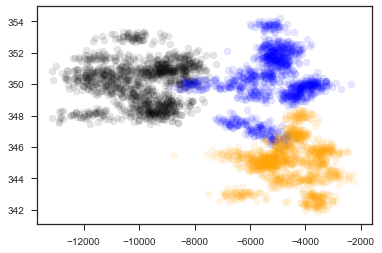

In [136]:
plt.scatter(normal['C_inlet']*(normal['Q_cool']*(normal['T_cool_in']-normal['T_cool_out']) )   ,normal['T_inlet'],alpha=0.1,c='k')
#plt.scatter(f1['C_inlet'],f1['T_inlet'],alpha=0.1,c='r')
plt.scatter(f2['C_inlet']   *(f2['Q_cool']*(f2['T_cool_in']-f2['T_cool_out'])    )  ,f2['T_inlet'],alpha=0.1,c='b')
#plt.scatter(f3['C_inlet'],f3['T_inlet'],alpha=0.1,c='g')
#plt.scatter(f4['C_inlet'],f4['T_inlet'],alpha=0.1,c='yellow')
plt.scatter(f5['C_inlet']  *(f5['Q_cool']*(f5['T_cool_in']-f5['T_cool_out'])  )      ,f5['T_inlet'],alpha=0.1,c='orange')


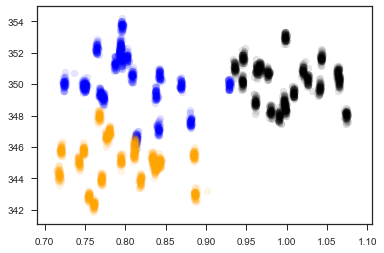

In [124]:
plt.scatter(normal['C_inlet'],normal['T_inlet'],alpha=0.1,c='k')

plt.scatter(f2['C_inlet'],f2['T_inlet'],alpha=0.1,c='b')
plt.scatter(f5['C_inlet'],f5['T_inlet'],alpha=0.1,c='orange')

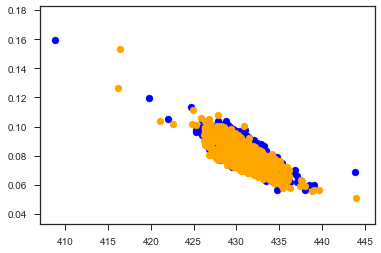

In [109]:
#plt.scatter(normal['T_reactor'],normal['C_reactor'],c='k')
#plt.scatter(f1['T_reactor'],f1['C_reactor'],c='r')
plt.scatter(f2['T_reactor'],f2['C_reactor'],c='b')
#plt.scatter(f3['T_reactor'],f3['C_reactor'],c='g')
#plt.scatter(f4['T_reactor'],f4['C_reactor'],c='yellow')
plt.scatter(f5['T_reactor'],f5['C_reactor'],c='orange')



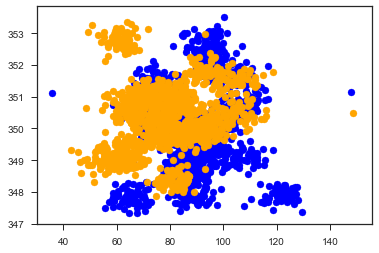

In [112]:
#plt.scatter(normal['Q_cool'],normal['T_cool_in'],c='k')
#plt.scatter(f1['Q_cool'],f1['T_cool_in'],c='r')
plt.scatter(f2['Q_cool'],f2['T_cool_in'],c='b')
#plt.scatter(f3['Q_cool'],f3['T_cool_in'],c='g')
#plt.scatter(f4['Q_cool'],f4['T_cool_in'],c='yellow')
plt.scatter(f5['Q_cool'],f5['T_cool_in'],c='orange')



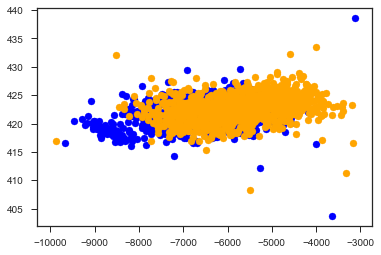

In [126]:
#plt.scatter(normal['Q_cool']*(normal['T_cool_in']-normal['T_cool_out']),normal['T_cool_out'],c='k')
#plt.scatter(f1['Q_cool']*(f1['T_cool_in']-f1['T_cool_out']),f1['T_cool_out'],c='r')
plt.scatter(f2['Q_cool']*(f2['T_cool_in']-f2['T_cool_out']),f2['T_cool_out'],c='b')
#plt.scatter(f3['Q_cool']*(f3['T_cool_in']-f3['T_cool_out']),f3['T_cool_out'],c='g')
#plt.scatter(f4['Q_cool']*(f4['T_cool_in']-f4['T_cool_out']),f4['T_cool_out'],c='yellow')
plt.scatter(f5['Q_cool']*(f5['T_cool_in']-f5['T_cool_out']),f5['T_cool_out'],c='orange')

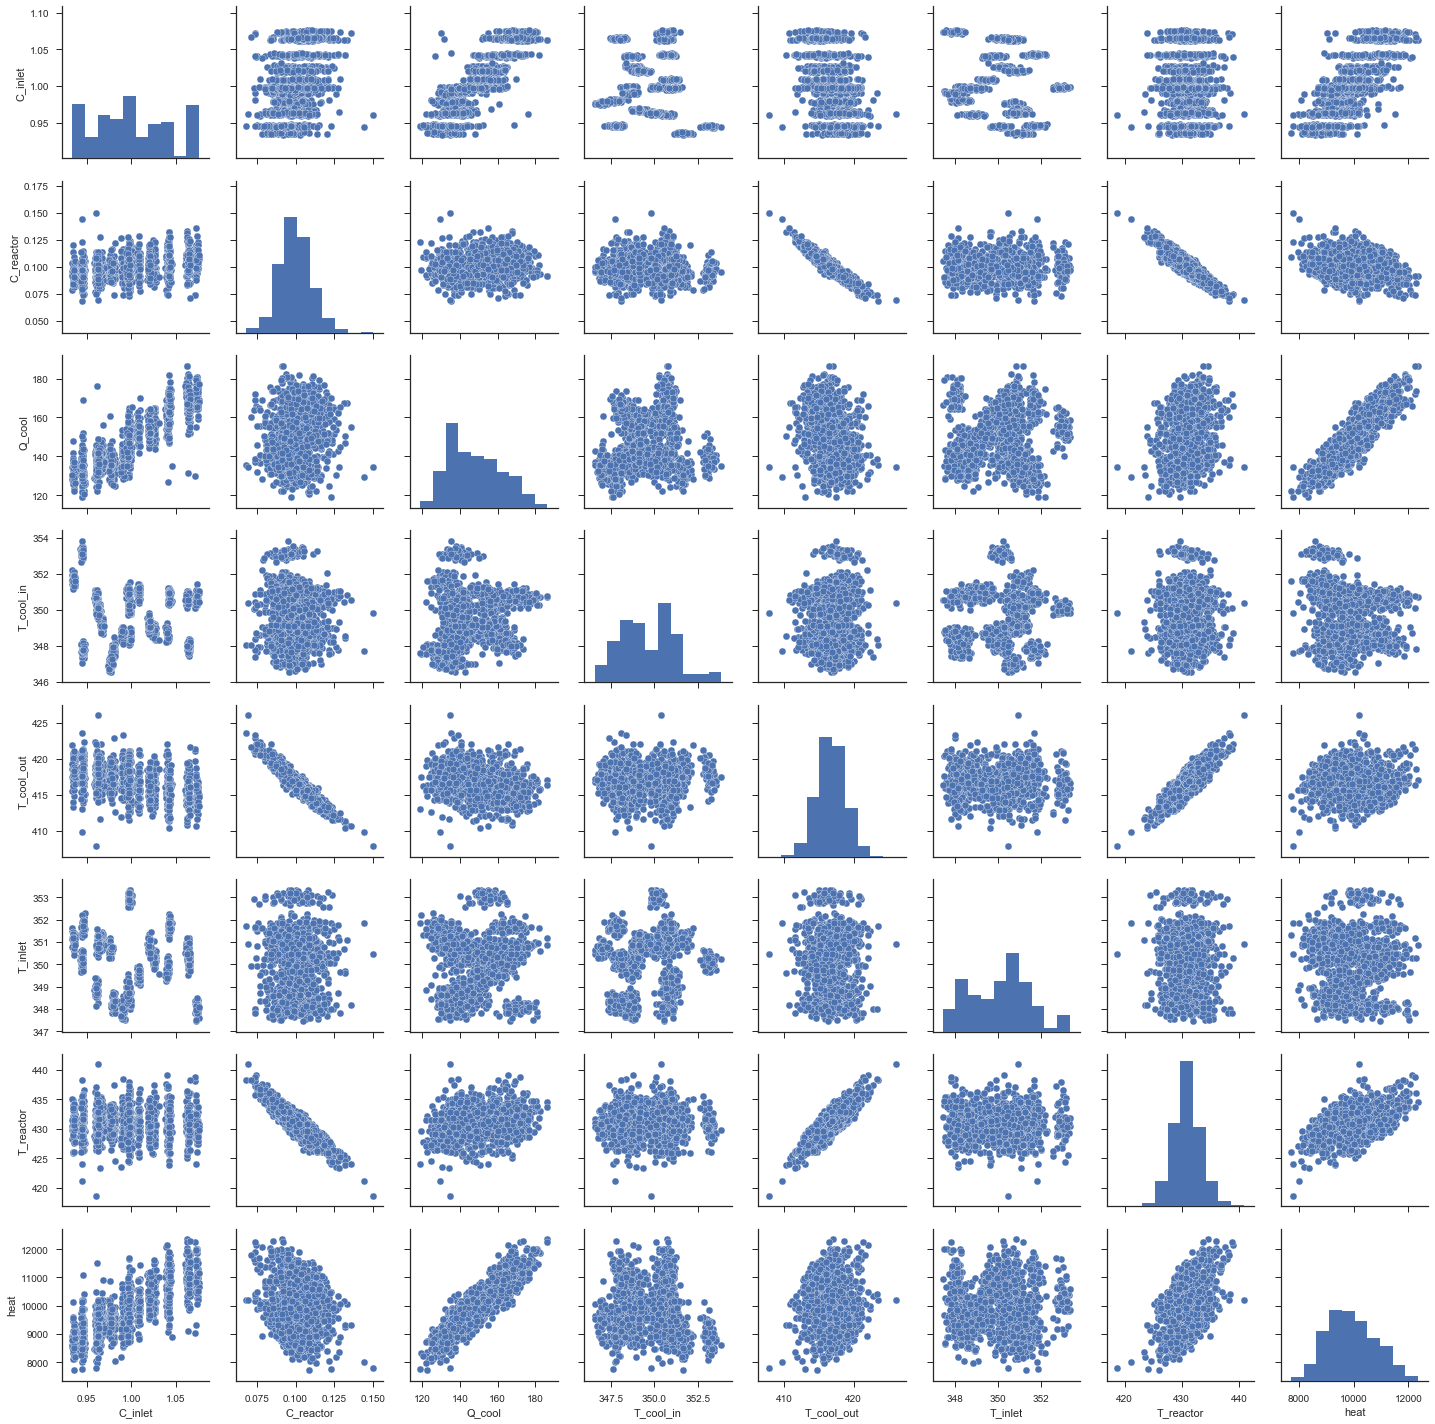

In [50]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(normal)


## independent variavles is c_inlet,t_inlet, T_cool_in, 

## controllale varibles : Q_cool
##  Q_cool*( T_cool_in-T_cool_out)
## dependent variables : C_REACTOR -> t_REACTOR -> Q_cool*( T_cool_in-T_cool_out)

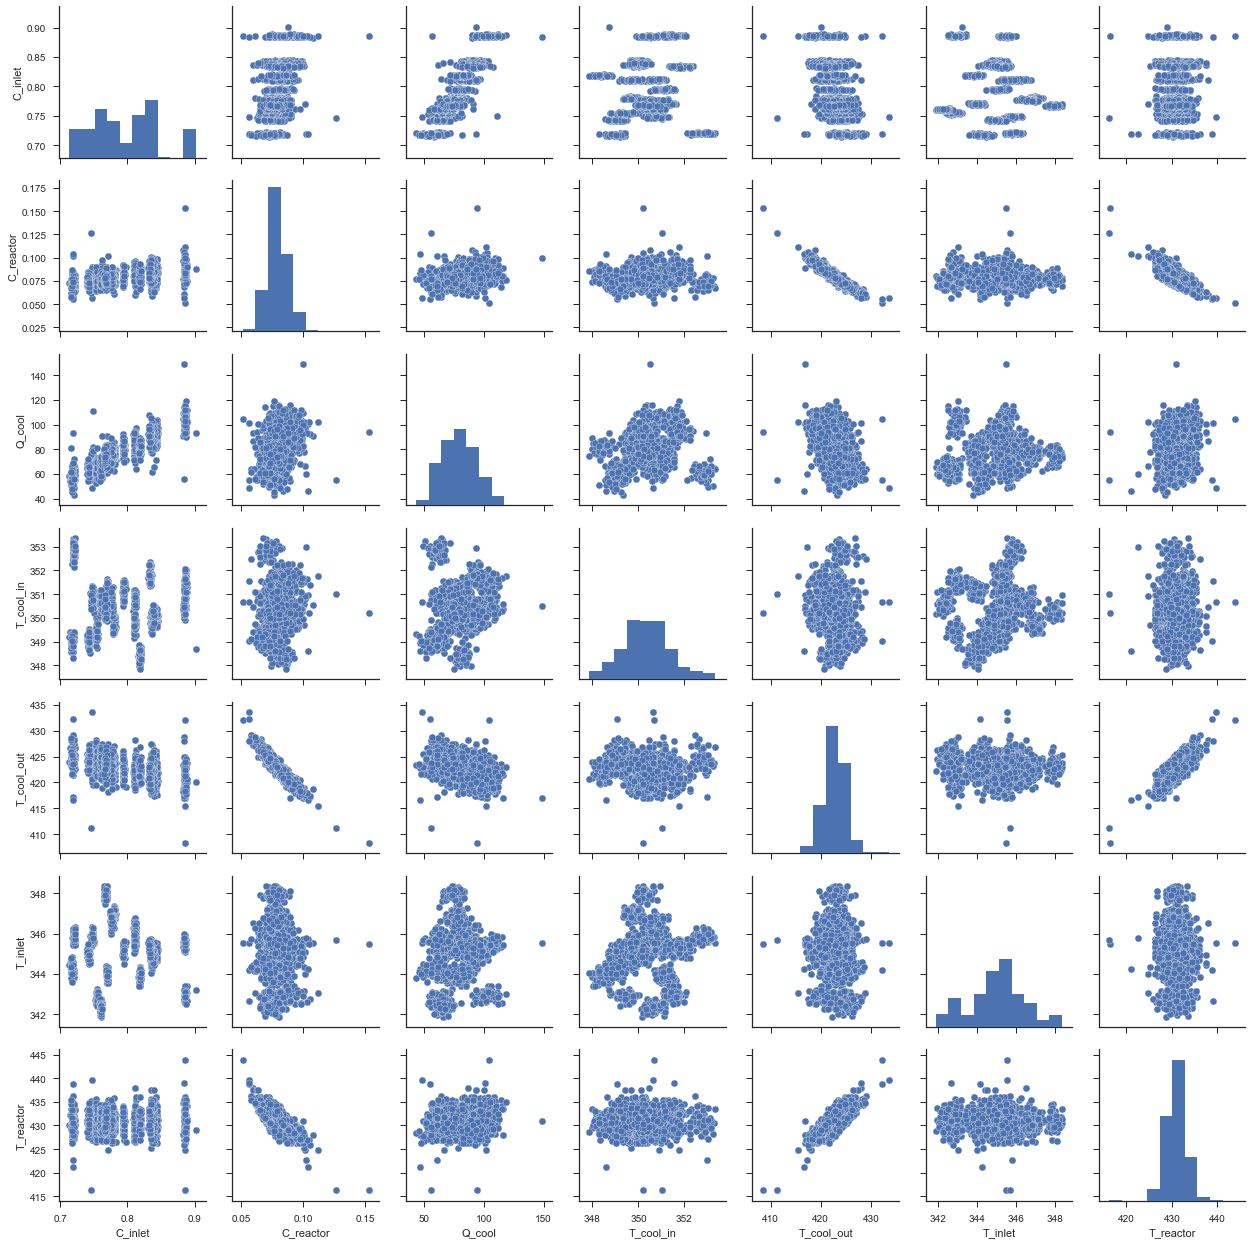

In [12]:
#  T_INLET LOW
sns.set(style="ticks")
sns.pairplot(f5)

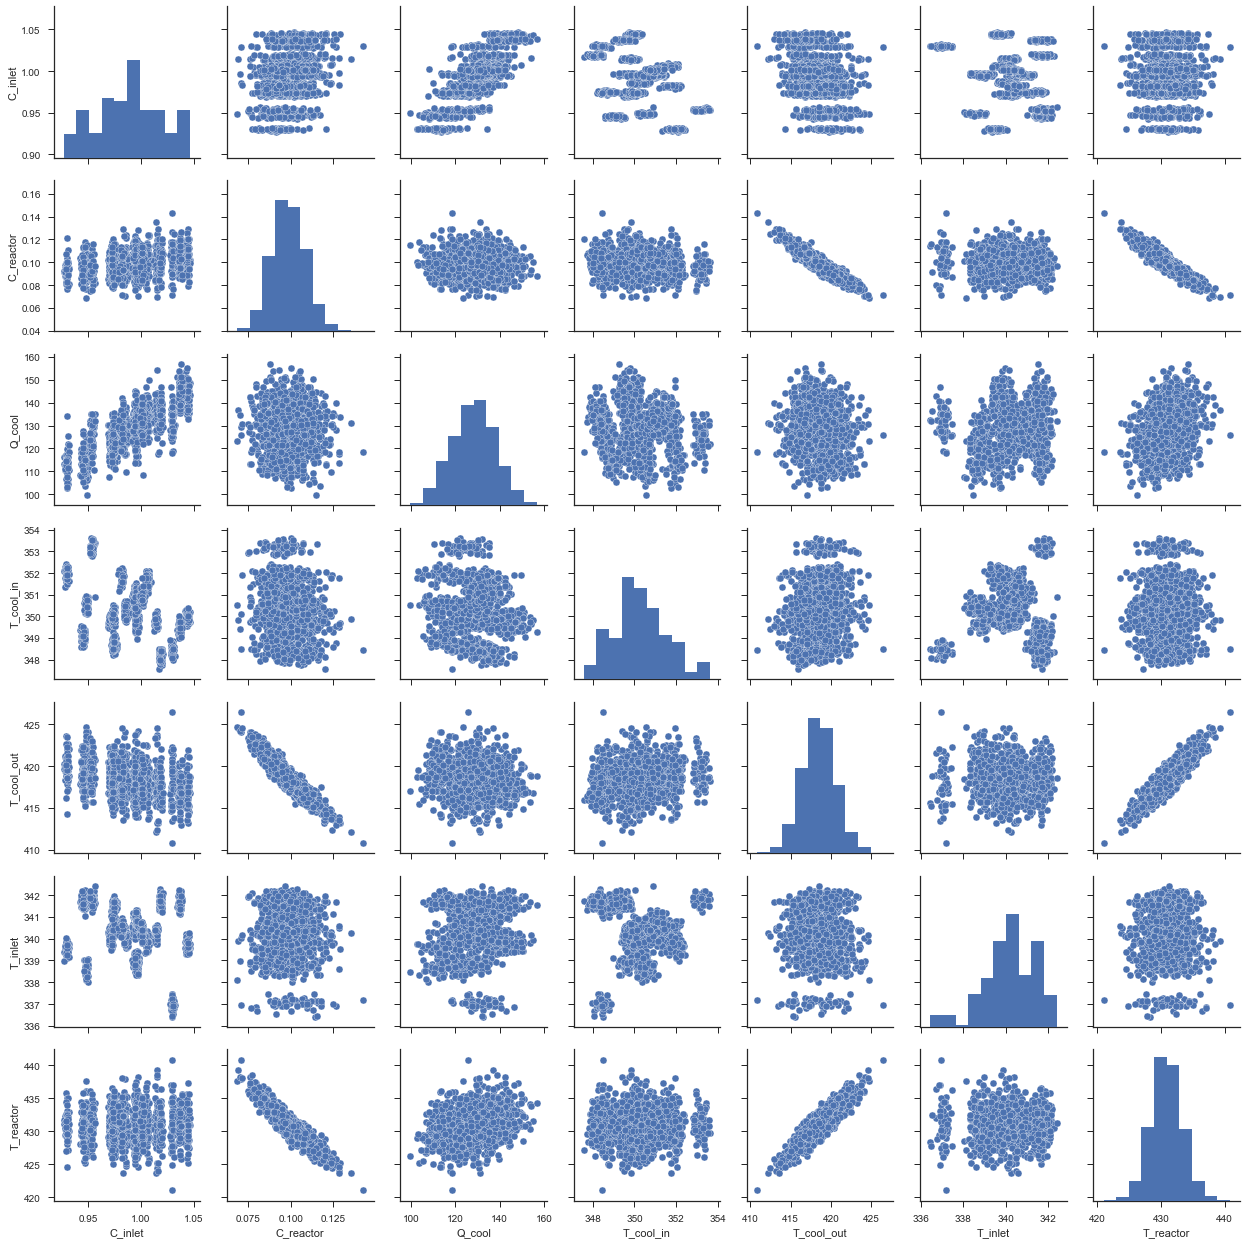

In [11]:
#  T_INLET LOW
sns.set(style="ticks")
sns.pairplot(f4)

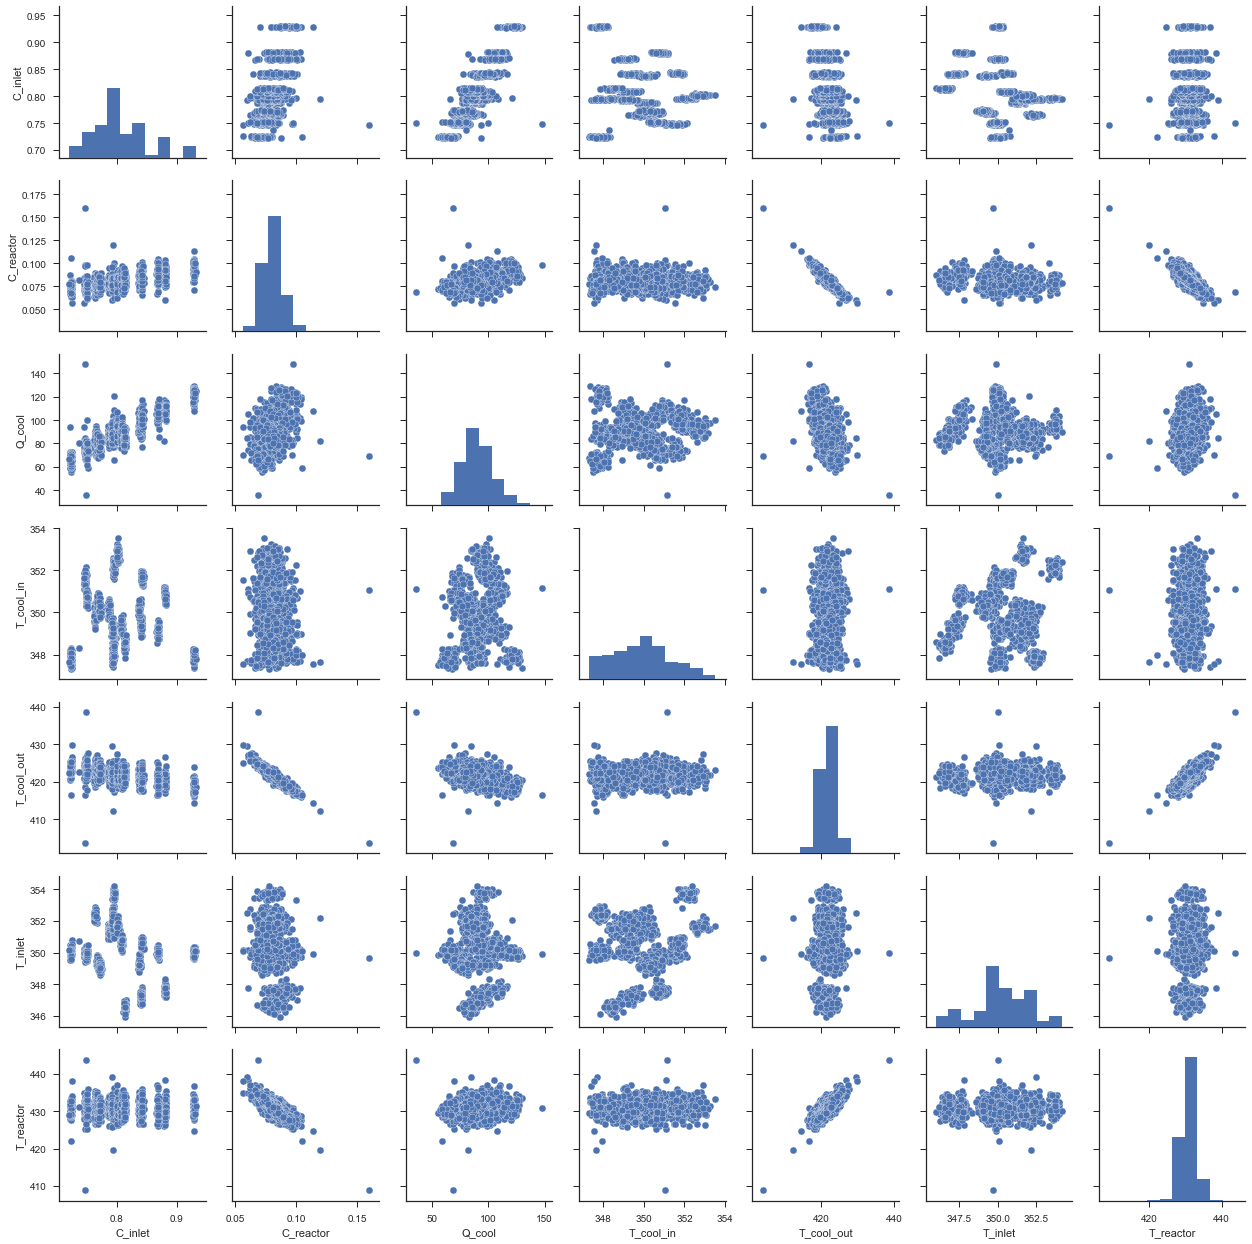

In [10]:
#  c_inlet low
sns.set(style="ticks")
sns.pairplot(f2)

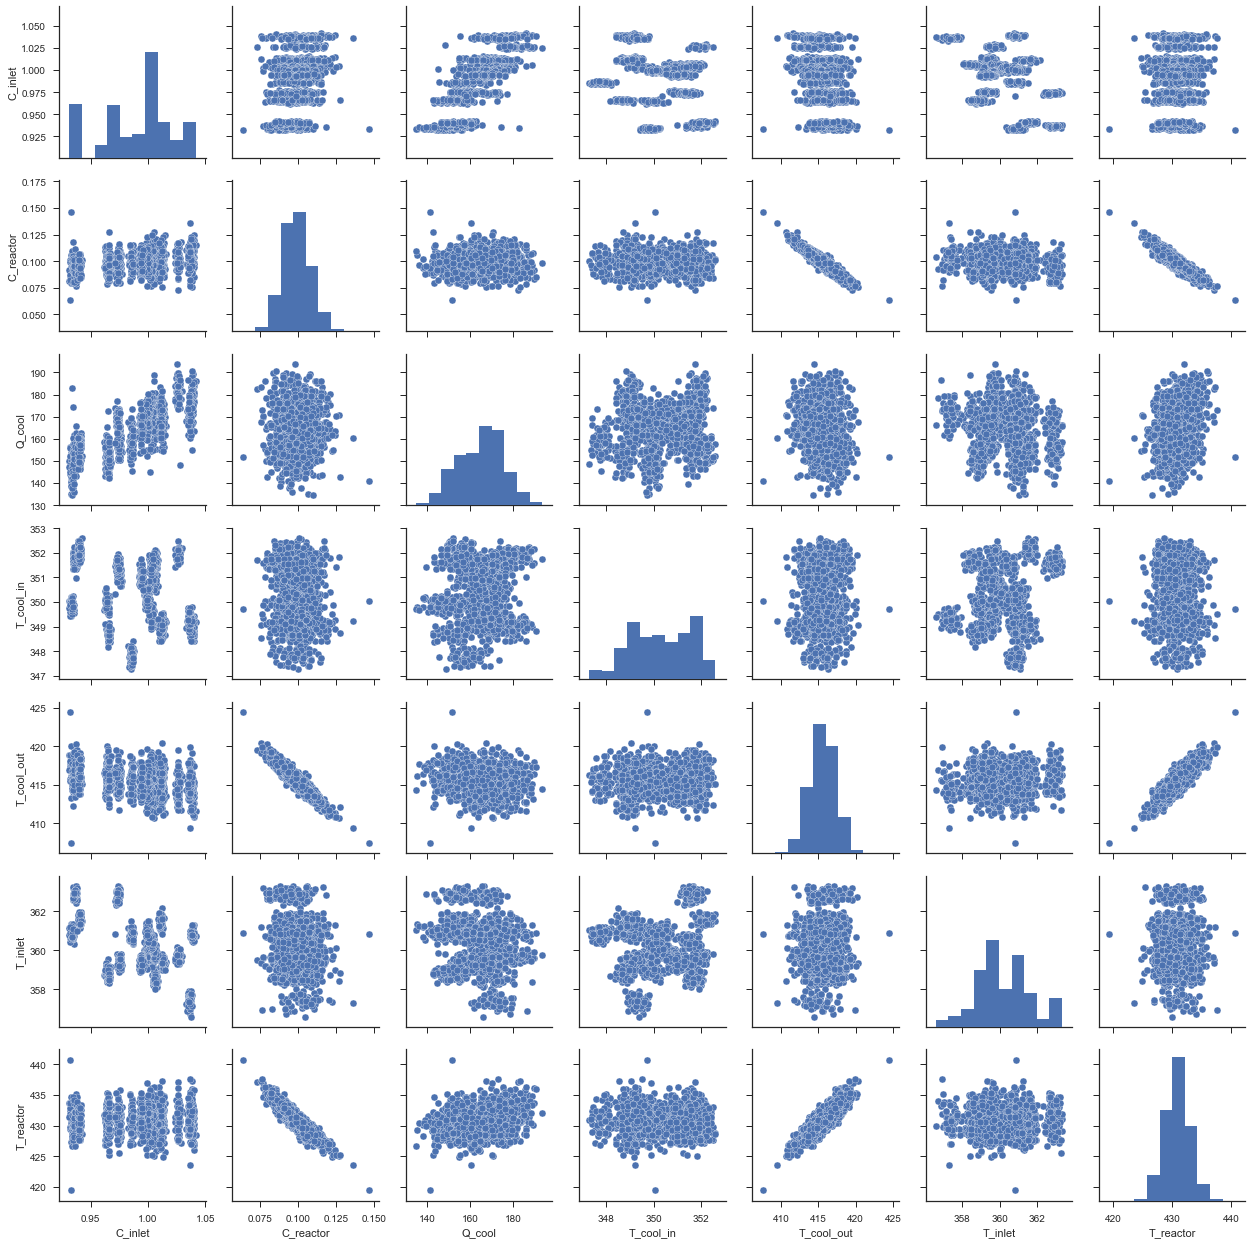

In [48]:
# tinlet so high
sns.set(style="ticks")
sns.pairplot(f3)

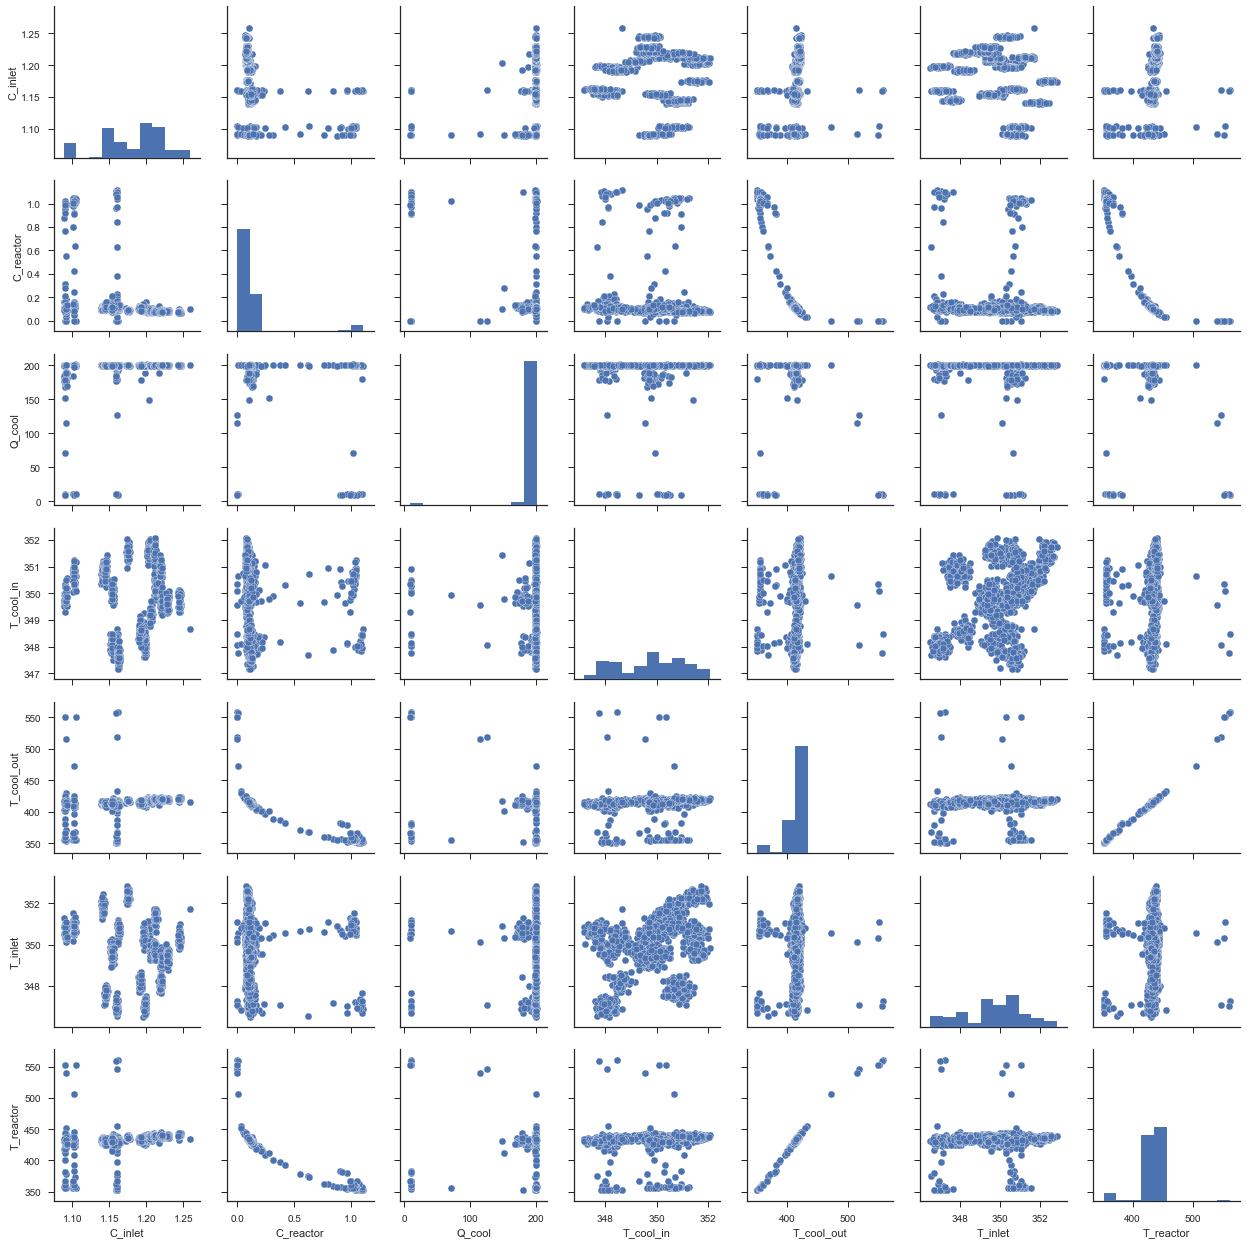

In [41]:
## input c_inlet too much
sns.set(style="ticks")
sns.pairplot(f1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121f31ac8>,
      dtype=object)

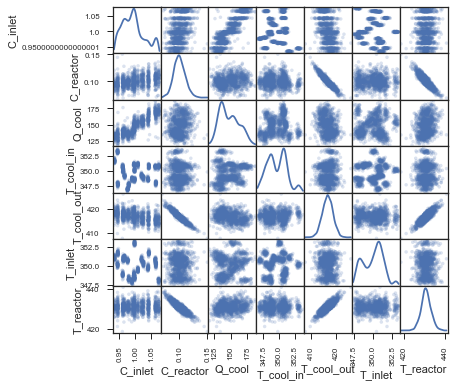

In [9]:

from pandas.plotting import scatter_matrix
scatter_matrix(normal, alpha=0.2, figsize=(6, 6), diagonal='kde')

/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


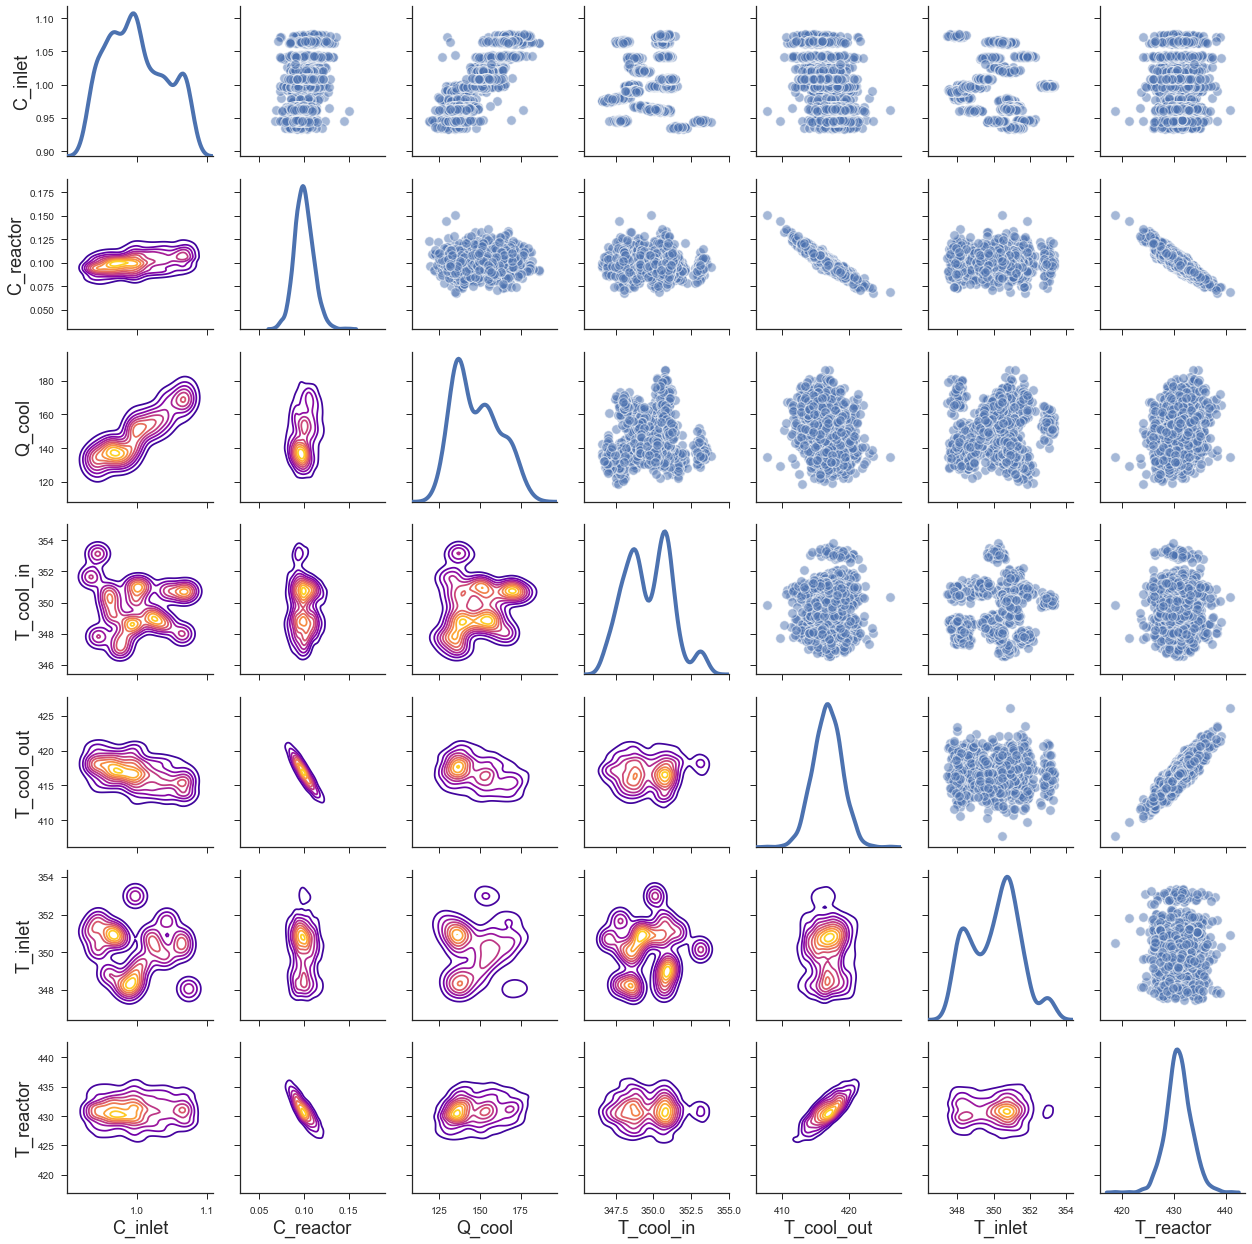

In [16]:
import matplotlib
matplotlib.pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(normal, diag_sharey=False)
axes = g.axes
g.map_upper(matplotlib.pyplot.scatter,  linewidths=1, 
            edgecolor="w", s=90, alpha = 0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap=cm.plasma)
matplotlib.pyplot.show()

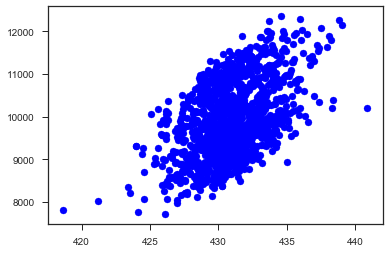

In [45]:

plt.scatter(normal['T_reactor'],normal['Q_cool']*(normal['T_cool_out'] -normal['T_cool_in']),c="b")